In [1]:
#Importing Modules
import snappy
from snappy import ProductIO
import matplotlib.pyplot as plt
import numpy as np
from snappy import HashMap
from snappy import GPF
from snappy import jpy

In [2]:
#Importing Product (Geometric Corrected)
def import_product(product_name):
    p = ProductIO.readProduct(product_name)
    return p

In [24]:
def bands(product):
    bands = list(product.getBandNames())
    return bands

def LandMasking(product,band,output_path):
    
    GPF.getDefaultInstance().getOperatorSpiRegistry().loadOperatorSpis()
    HashMap = jpy.get_type('java.util.HashMap')
    parameters = HashMap()
    parameters.put('vectorFile','gshhg-shp-2.3.7/GSHHS_shp/f/GSHHS_f_L1.shp')
    parameters.put('separateShapes', False)
    
    result = GPF.createProduct('Import-Vector', parameters, product)
    #ProductIO.writeProduct(result, "TEST_POLYGON", 'BEAM-DIMAP')
    
    parameters = HashMap()
    BandDescriptor = jpy.get_type('org.esa.snap.core.gpf.common.BandMathsOp$BandDescriptor')
    targetBand_1 = BandDescriptor()
    targetBand_1.name = 'Masked_'+str(band)
    targetBand_1.type = 'float32'
    targetBand_1.expression = "if GSHHS_f_L1 then 0 else 1 || "+str(band)
    #targetBand_1.expression = 'if GSHHS_f_L1 then 0 else 1'

    targetBands = jpy.array('org.esa.snap.core.gpf.common.BandMathsOp$BandDescriptor', 1)
    targetBands[0] = targetBand_1

    parameters.put('targetBands', targetBands)
    output = GPF.createProduct('BandMaths', parameters, result)
    ProductIO.writeProduct(output, str(output_path)+"/LandMasked_"+str(band), 'GeoTIFF')
    return output


def bandVisulization(product,band,output_path):
    b_data = Band_data(product,band)
    
    # Plot the band  
    plt.figure(figsize=(18,10))
    plt.imshow(b_data, cmap='gray')
    plt.savefig(str(output_path)+'/bandVisulization'+str(band)+'.png')
    plt.show()

def Band_data(product,band):
    band = product.getBand(str(band))
    w = product.getSceneRasterWidth() # Get Band Width
    h = product.getSceneRasterHeight() # Get Band Height
    
    # Create an empty array
    band_data = np.zeros(w * h, np.float32)
    
    # Populate array with pixel value
    band.readPixels(0, 0, w, h, band_data)
    
    # Reshape
    band_data.shape = h, w
    
    return band_data

['Amplitude_VH', 'Amplitude_VV']


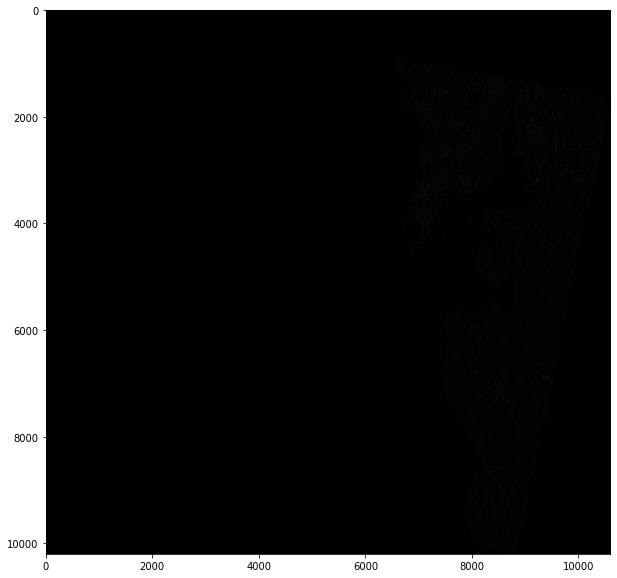

In [12]:
product = import_product('Dataset_963A/terrain_corr_subset_of_S1A_IW_GRDH_1SDV_20200825T010320_20200825T010345_034056_03F420_963A_TC.tif')
band_d = bands(product)
print(band_d)
bandVisulization(product,band_d[0],'/media/h_mittal/My Data 2/Dissertation/ASDUSI/Conferences/ISRSNS2020/Data/')

In [25]:
d = LandMasking(product,band_d[0],'/media/h_mittal/My Data 2/Dissertation/ASDUSI/Conferences/ISRSNS2020/Data/')

RuntimeError: org.esa.snap.core.gpf.OperatorException: Could not parse expression: 'if GSHHS_f_L1 then 0 else 1 || Amplitude_VH'. Boolean operands expected for binary '||' or 'or' operator.

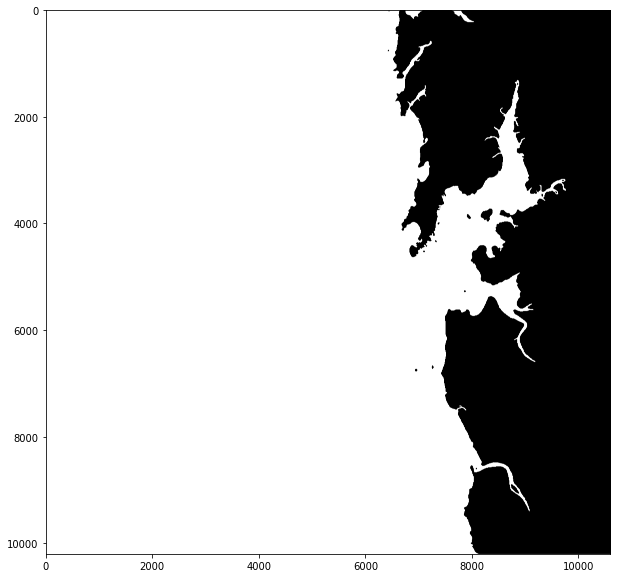

In [11]:
b_d = bands(d)
bandVisulization(d,b_d[0],'/media/h_mittal/My Data 2/Dissertation/ASDUSI/Conferences/ISRSNS2020/Data/')